### **1. Objective (Goal of the Dataset)**  
The goal is to **develop a machine learning model** that can **predict the risk of heart disease** based on **health and lifestyle factors**.

- **Target Variable:**  
  - **Heart_Risk**:  
    - **1**: High risk of heart disease.  
    - **0**: Low or no risk of heart disease.  


###  **2. Dataset Features (Column Descriptions)**  

| **Column Name**         | **Description**                              | **Data Type**         |
|-------------------------|----------------------------------------------|-----------------------|
| **Heart_Risk**          | Heart disease risk (target variable).         | Binary (0 or 1)       |
| **Cold_Sweats_Nausea**  | Presence of cold sweats or nausea.            | Binary (0 or 1)       |
| **Pain_Arms_Jaw_Back**  | Pain in arms, jaw, or back.                   | Binary (0 or 1)       |
| **Swelling**            | Swelling in the body.                         | Binary (0 or 1)       |
| **Dizziness**           | Feeling of dizziness.                         | Binary (0 or 1)       |
| **Fatigue**             | Chronic fatigue.                              | Binary (0 or 1)       |
| **Shortness_of_Breath** | Difficulty in breathing.                      | Binary (0 or 1)       |
| **Chest_Pain**          | Presence of chest pain.                       | Binary (0 or 1)       |
| **Palpitations**        | Experience of heart palpitations.             | Binary (0 or 1)       |
| **Age**                 | Age of the individual.                        | Integer (Numerical)   |
| **Sedentary_Lifestyle** | Leading a sedentary (inactive) lifestyle.     | Binary (0 or 1)       |
| **Obesity**             | Whether the person is obese.                  | Binary (0 or 1)       |
| **Chronic_Stress**      | Experience of long-term stress.               | Binary (0 or 1)       |
| **Diabetes**            | Presence of diabetes.                         | Binary (0 or 1)       |
| **Family_History**      | Family history of heart disease.              | Binary (0 or 1)       |
| **Smoking**             | Whether the person is a smoker.               | Binary (0 or 1)       |
| **High_BP**             | High blood pressure (hypertension).           | Binary (0 or 1)       |
| **High_Cholesterol**    | High cholesterol levels.                      | Binary (0 or 1)       |
| **Gender**              | Gender (1 for male, 0 for female).            | Binary (0 or 1)       |



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy.stats import ttest_ind,chi2_contingency



In [2]:
df=pd.read_csv("heart_disease_risk_dataset_corrupted.csv")
df

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0,0,0,1,0,0,0,0,NaN,0.0,0,1,0,1,0,0,0,48,0
1,0,1,0,1,0,0,0,0,2.0,0.0,0,1,1,0,0,0,0,46,0
2,1,0,0,1,0,0,0,0,1.0,1.0,0,1,1,1,0,0,1,66,0
3,1,1,0,1,0,0,1,1,1.0,NaN,1,1,0,1,1,1,1,0,1
4,0,0,1,0,1,0,0,0,NaN,0.0,1,0,0,0,0,0,0,69,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72095,1,1,1,1,1,1,1,1,0.0,1.0,0,1,1,0,0,0,1,48,1
72096,1,1,1,1,0,1,1,1,1.0,0.0,0,0,1,1,1,1,0,47,1
72097,1,0,0,0,0,0,0,0,0.0,0.0,0,1,0,0,0,0,0,25,0
72098,0,1,0,0,1,0,0,0,0.0,1.0,0,1,1,1,1,1,0,47,0


### handling duplicate rows

In [3]:
df.duplicated().sum()

5843

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66257 entries, 0 to 72099
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           66257 non-null  int64  
 1   Shortness_of_Breath  66257 non-null  int64  
 2   Fatigue              66257 non-null  int64  
 3   Palpitations         66257 non-null  int64  
 4   Dizziness            66257 non-null  int64  
 5   Swelling             66257 non-null  int64  
 6   Pain_Arms_Jaw_Back   66257 non-null  int64  
 7   Cold_Sweats_Nausea   66257 non-null  int64  
 8   High_BP              56315 non-null  float64
 9   High_Cholesterol     56057 non-null  float64
 10  Diabetes             66257 non-null  int64  
 11  Smoking              66257 non-null  int64  
 12  Obesity              66257 non-null  int64  
 13  Sedentary_Lifestyle  66257 non-null  int64  
 14  Family_History       66257 non-null  int64  
 15  Chronic_Stress       66257 non-null  int6

### handling missing values

In [7]:
df.isnull().sum()

Chest_Pain                 0
Shortness_of_Breath        0
Fatigue                    0
Palpitations               0
Dizziness                  0
Swelling                   0
Pain_Arms_Jaw_Back         0
Cold_Sweats_Nausea         0
High_BP                 9942
High_Cholesterol       10200
Diabetes                   0
Smoking                    0
Obesity                    0
Sedentary_Lifestyle        0
Family_History             0
Chronic_Stress             0
Gender                     0
Age                     8110
Heart_Risk                 0
dtype: int64

Missing Values in Key Columns

| **Column**            | **Description**                                | **Data Type**           |
|-----------------------|-----------------------------------------------|-------------------------|
| `High_BP`             | Does the patient have **high blood pressure**? | **Binary (Yes/No)**     |
| `High_Cholesterol`    | Does the patient have **high cholesterol levels**? | **Binary (Yes/No)**     |
| `Age`                 | **Patient's age** (stored as `object` instead of numeric). | **Object (should be converted to numeric)** |




In [8]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


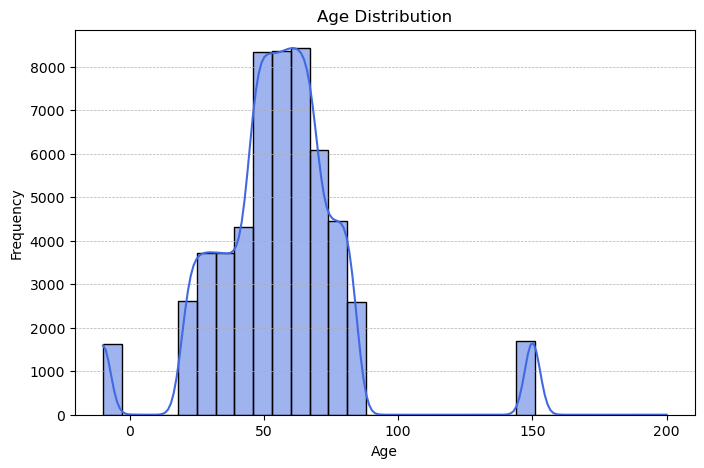

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='royalblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()


In [10]:
df['Age'].isnull().sum()

10315

In [11]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [12]:
df['Age'].isnull().sum()

0

In [13]:
df['High_BP'].value_counts()

High_BP
0.0    27124
1.0    26749
2.0     2442
Name: count, dtype: int64

In [14]:
df = df[df['High_BP'] != 2.0]

In [15]:
df['High_BP'].value_counts()

High_BP
0.0    27124
1.0    26749
Name: count, dtype: int64

In [16]:
imputer = KNNImputer(n_neighbors=15)
df.loc[:, 'High_BP'] = imputer.fit_transform(df[['High_BP']]).round().astype(int)

print(df['High_BP'].value_counts())



High_BP
0.0    37066
1.0    26749
Name: count, dtype: int64


In [17]:
df['High_Cholesterol'].value_counts()

High_Cholesterol
0.0    27199
1.0    26804
Name: count, dtype: int64

In [18]:
imputer = KNNImputer(n_neighbors=15)
df.loc[:, 'High_Cholesterol'] = imputer.fit_transform(df[['High_Cholesterol']]).round().astype(int)

print(df['High_Cholesterol'].value_counts())

High_Cholesterol
0.0    37011
1.0    26804
Name: count, dtype: int64


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63815 entries, 0 to 72099
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Chest_Pain           63815 non-null  int64  
 1   Shortness_of_Breath  63815 non-null  int64  
 2   Fatigue              63815 non-null  int64  
 3   Palpitations         63815 non-null  int64  
 4   Dizziness            63815 non-null  int64  
 5   Swelling             63815 non-null  int64  
 6   Pain_Arms_Jaw_Back   63815 non-null  int64  
 7   Cold_Sweats_Nausea   63815 non-null  int64  
 8   High_BP              63815 non-null  float64
 9   High_Cholesterol     63815 non-null  float64
 10  Diabetes             63815 non-null  int64  
 11  Smoking              63815 non-null  int64  
 12  Obesity              63815 non-null  int64  
 13  Sedentary_Lifestyle  63815 non-null  int64  
 14  Family_History       63815 non-null  int64  
 15  Chronic_Stress       63815 non-null  int6

### Outlier Detection

In [20]:
df.describe()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
count,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000,63815.000000
mean,0.496576,0.498143,0.496639,0.496545,0.499350,0.496733,0.499412,0.500243,0.419165,0.420027,0.500259,3.503628,0.497767,0.502217,0.496247,0.498942,0.547708,55.473290,0.497281
std,0.499992,0.500000,0.499993,0.499992,0.500003,0.499993,0.500004,0.500004,0.493426,0.493567,0.500004,16.610879,0.499999,0.499999,0.499990,0.500003,0.497723,23.443079,0.499997
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,56.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,200.000000,1.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Chest_Pain'),
  Text(1, 0, 'Shortness_of_Breath'),
  Text(2, 0, 'Fatigue'),
  Text(3, 0, 'Palpitations'),
  Text(4, 0, 'Dizziness'),
  Text(5, 0, 'Swelling'),
  Text(6, 0, 'Pain_Arms_Jaw_Back'),
  Text(7, 0, 'Cold_Sweats_Nausea'),
  Text(8, 0, 'High_BP'),
  Text(9, 0, 'High_Cholesterol'),
  Text(10, 0, 'Diabetes'),
  Text(11, 0, 'Smoking'),
  Text(12, 0, 'Obesity'),
  Text(13, 0, 'Sedentary_Lifestyle'),
  Text(14, 0, 'Family_History'),
  Text(15, 0, 'Chronic_Stress'),
  Text(16, 0, 'Gender'),
  Text(17, 0, 'Age'),
  Text(18, 0, 'Heart_Risk')])

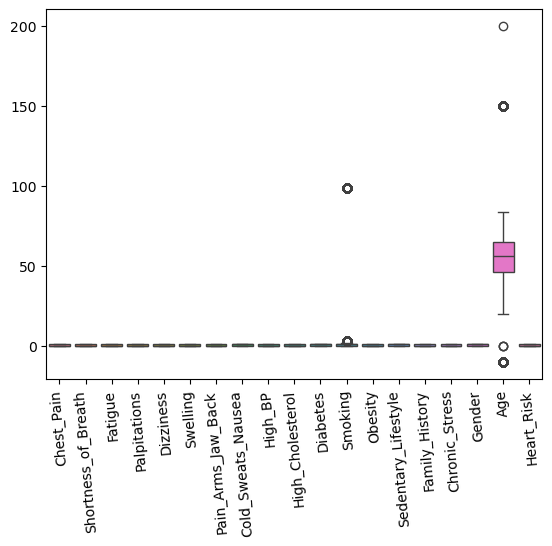

In [21]:
sns.boxplot(df)
plt.xticks(rotation=95)

### handling the outliers

  **Outliers in the Data:**

1. AgeColumn:
   - There are negative values (-10), which are not logical.  
   - The maximum value (200) is unusually high and outside the typical human age range.

2. Smoking Column:
   - The maximum value (99) is abnormal since other columns are binary (0 or 1).

<Axes: xlabel='Age'>

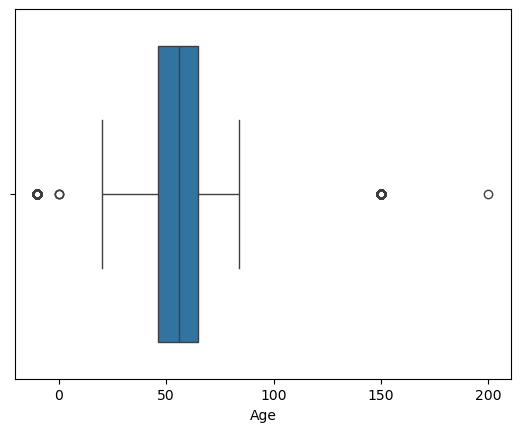

In [22]:
sns.boxplot(x=df['Age'])


In [23]:
(df['Age'] >= 18) & (df['Age'] <= 120)

0         True
2         True
3        False
4         True
5         True
         ...  
72064     True
72083     True
72084     True
72093     True
72099     True
Name: Age, Length: 63815, dtype: bool

In [24]:
df = df[(df['Age'] >= 18) & (df['Age'] <= 120)]
print(df['Age'].describe())


count    60598.000000
mean        54.638734
std         15.004951
min         20.000000
25%         47.000000
50%         56.000000
75%         64.000000
max         84.000000
Name: Age, dtype: float64


In [25]:
print(df['Smoking'].value_counts())


Smoking
0     27708
1     27615
3      1801
99     1780
2      1694
Name: count, dtype: int64


In [26]:
most_frequent_value = df['Smoking'].mode()[0]
df['Smoking'] = df['Smoking'].apply(lambda x: most_frequent_value if x not in [0, 1] else x)

In [27]:
print(df['Smoking'].value_counts())

Smoking
0    32983
1    27615
Name: count, dtype: int64


In [28]:
df['Smoking'].describe()

count    60598.000000
mean         0.455708
std          0.498038
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Smoking, dtype: float64

### Exploratory Data Analysis

` Attribute Classification: `

**A. Numerical Attribute:**  
- Age (Continuous)  

**B. Categorical Attribute:**  
- Gender (Nominal)  

**C. Binary Attributes (0: No, 1: Yes):**  
- Chest_Pain
- Shortness_of_Breath 
- Fatigue 
- Palpitations
- Dizziness
- Swelling  
- Pain_Arms_Jaw_Back
- Cold_Sweats_Nausea
- High_BP
- High_Cholesterol
- Smoking
- Obesity
- Sedentary_Lifestyle
- Family_History
- Chronic_Stress 

**D. Target Variable:**  
- Heart_Risk

In [29]:
df.describe()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
count,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000,60598.000000
mean,0.496832,0.498152,0.496601,0.496271,0.500000,0.496683,0.499307,0.500231,0.418826,0.419898,0.500627,0.455708,0.498102,0.502904,0.496518,0.499109,0.548021,54.638734,0.497475
std,0.499994,0.500001,0.499993,0.499990,0.500004,0.499993,0.500004,0.500004,0.493371,0.493546,0.500004,0.498038,0.500001,0.499996,0.499992,0.500003,0.497693,15.004951,0.499998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,56.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.000000,1.000000


`Dataset Summary `
- Total Records: 60,598 samples.  
- Balanced Data: Most features are evenly split (0 or 1).  

Age
- Mean Age: 54.6 years (Range: 20–84).  
Insight: Focuses on middle-aged and older adults.  

Gender
- Male: 54%, Female: 46%.  
Insight: Slight male dominance.  

Binary Features 
- Most symptoms and conditions are evenly distributed.  
Insight: Balanced representation of medical conditions.  

Heart Risk
- Mean: 0.497 (Balanced target).  
Insight: Ideal for unbiased model training.

`Checking Balanced or Imbalanced Dataset`

Text(0.5, 1.02, 'Count of TARGET Variable per category')

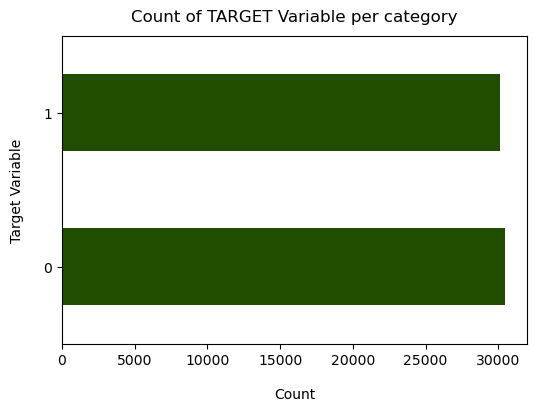

In [30]:
df['Heart_Risk'].value_counts().plot(kind='barh', color="#204D00", figsize=(6, 4))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)


In [31]:
df['Heart_Risk'].value_counts()

Heart_Risk
0    30452
1    30146
Name: count, dtype: int64

` Distribution of Heart_Risk Classes:`

| Class (Heart_Risk) | Count   |
|--------------------|---------|
| **0** (No Risk)    | **32,081** |
| **1** (At Risk)    | **31,734** |


- The class distribution is **balanced**:
  - Class 0 ≈ **50.27%**
  - Class 1 ≈ **49.73%**
 **Balanced data** helps machine learning models avoid **bias** toward the majority class, improving model performance.



In [32]:
# Checking which feature/column should be converted into Bins
for column in df.columns:
    print(f'{column} =>', df[column].value_counts().shape)

Chest_Pain => (2,)
Shortness_of_Breath => (2,)
Fatigue => (2,)
Palpitations => (2,)
Dizziness => (2,)
Swelling => (2,)
Pain_Arms_Jaw_Back => (2,)
Cold_Sweats_Nausea => (2,)
High_BP => (2,)
High_Cholesterol => (2,)
Diabetes => (2,)
Smoking => (2,)
Obesity => (2,)
Sedentary_Lifestyle => (2,)
Family_History => (2,)
Chronic_Stress => (2,)
Gender => (2,)
Age => (65,)
Heart_Risk => (2,)


- we can group the data into 5 bins.
- Binning these values will simplify the analysis and enhance the clarity of data visualization

In [33]:
bins = [18, 25, 35, 45, 55, float('inf')]
labels = ['18-25', '26-35', '36-45', '46-55', '56+']

df['Age_Binned'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

print(df['Age_Binned'].value_counts())


Age_Binned
56+      35294
46-55    11454
36-45     5690
26-35     5128
18-25     3032
Name: count, dtype: int64


C:\Users\alaa\AppData\Local\Temp\ipykernel_9812\2619611320.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_Binned', data=df, palette='viridis')


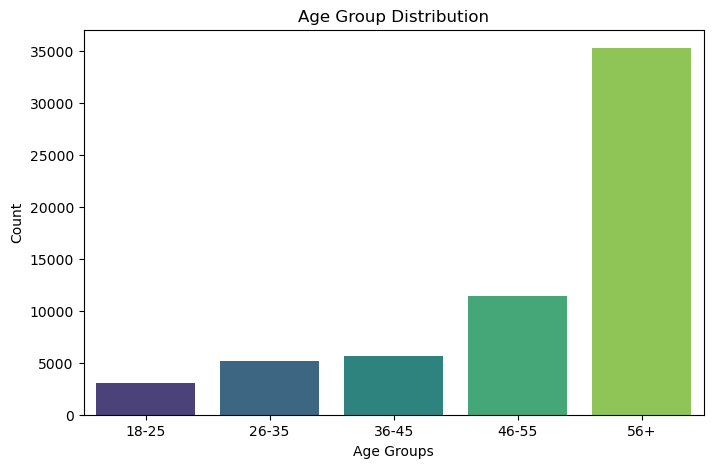

In [34]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Age_Binned', data=df, palette='viridis')
plt.title('Age Group Distribution')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()



- Most of the people in the data are over 56 years old, while the 18-25 category is the lowest. This may indicate that older adults are more represented in the study on heart disease risk.

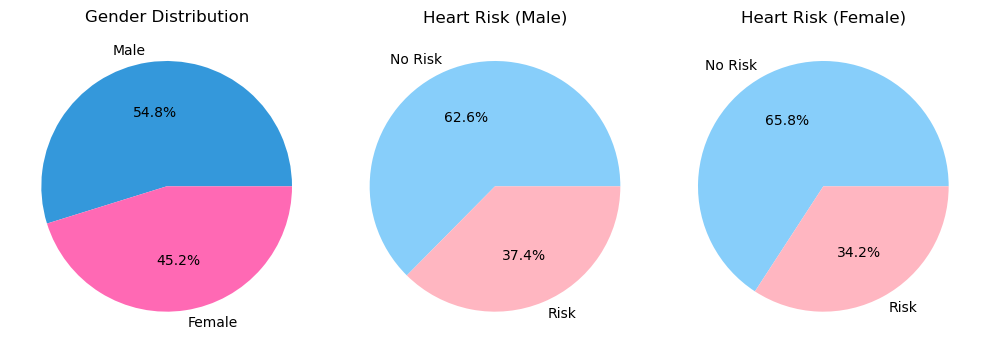

In [35]:
gender_colors = ['#3498db', '#ff69b4']      
risk_colors = ['#87CEFA', '#FFB6C1']   

gender_counts = df['Gender'].value_counts()

male_risk = df[df['Gender'] == 1]['Heart_Risk'].value_counts()
female_risk = df[df['Gender'] == 0]['Heart_Risk'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(10, 4))

axes[0].pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', colors=gender_colors)
axes[0].set_title('Gender Distribution')

axes[1].pie(male_risk, labels=['No Risk', 'Risk'], autopct='%1.1f%%', colors=risk_colors)
axes[1].set_title('Heart Risk (Male)')

axes[2].pie(female_risk, labels=['No Risk', 'Risk'], autopct='%1.1f%%', colors=risk_colors)
axes[2].set_title('Heart Risk (Female)')

plt.tight_layout()
plt.show()


Males have a higher proportion both in the dataset and in heart disease risk compared to females.
Both genders show balanced representation in heart disease risk, though males are slightly more affected.

C:\Users\alaa\AppData\Local\Temp\ipykernel_9812\3030102031.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_risk_counts = df.groupby(['Age_Binned', 'Heart_Risk']).size().unstack(fill_value=0)


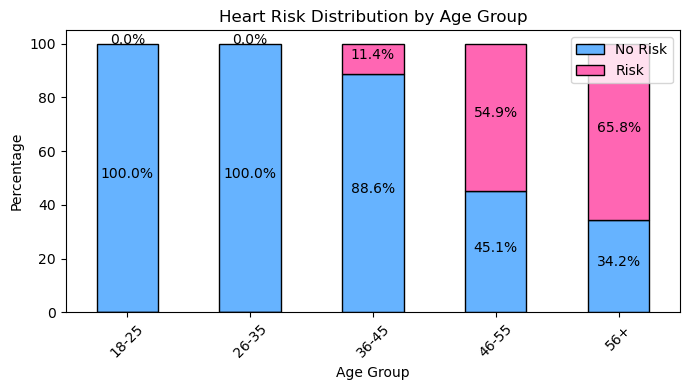

In [36]:
age_risk_counts = df.groupby(['Age_Binned', 'Heart_Risk']).size().unstack(fill_value=0)
age_risk_percent = age_risk_counts.div(age_risk_counts.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(7, 4))

colors = ['#66b3ff', '#ff66b3'] 
labels = ['No Risk', 'Risk']

bars = age_risk_percent.plot(kind='bar', stacked=True, color=colors, ax=ax, edgecolor='black')

for i, (no_risk, risk) in enumerate(zip(age_risk_percent[0], age_risk_percent[1])):
    ax.text(i, no_risk / 2, f'{no_risk:.1f}%', ha='center', color='black', fontsize=10)
    ax.text(i, no_risk + risk / 2, f'{risk:.1f}%', ha='center', color='black', fontsize=10)

ax.set_ylabel('Percentage')
ax.set_xlabel('Age Group')
ax.set_title('Heart Risk Distribution by Age Group')
ax.legend(labels)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Heart disease risk increases with age, becoming a major concern from 46 years onwards.

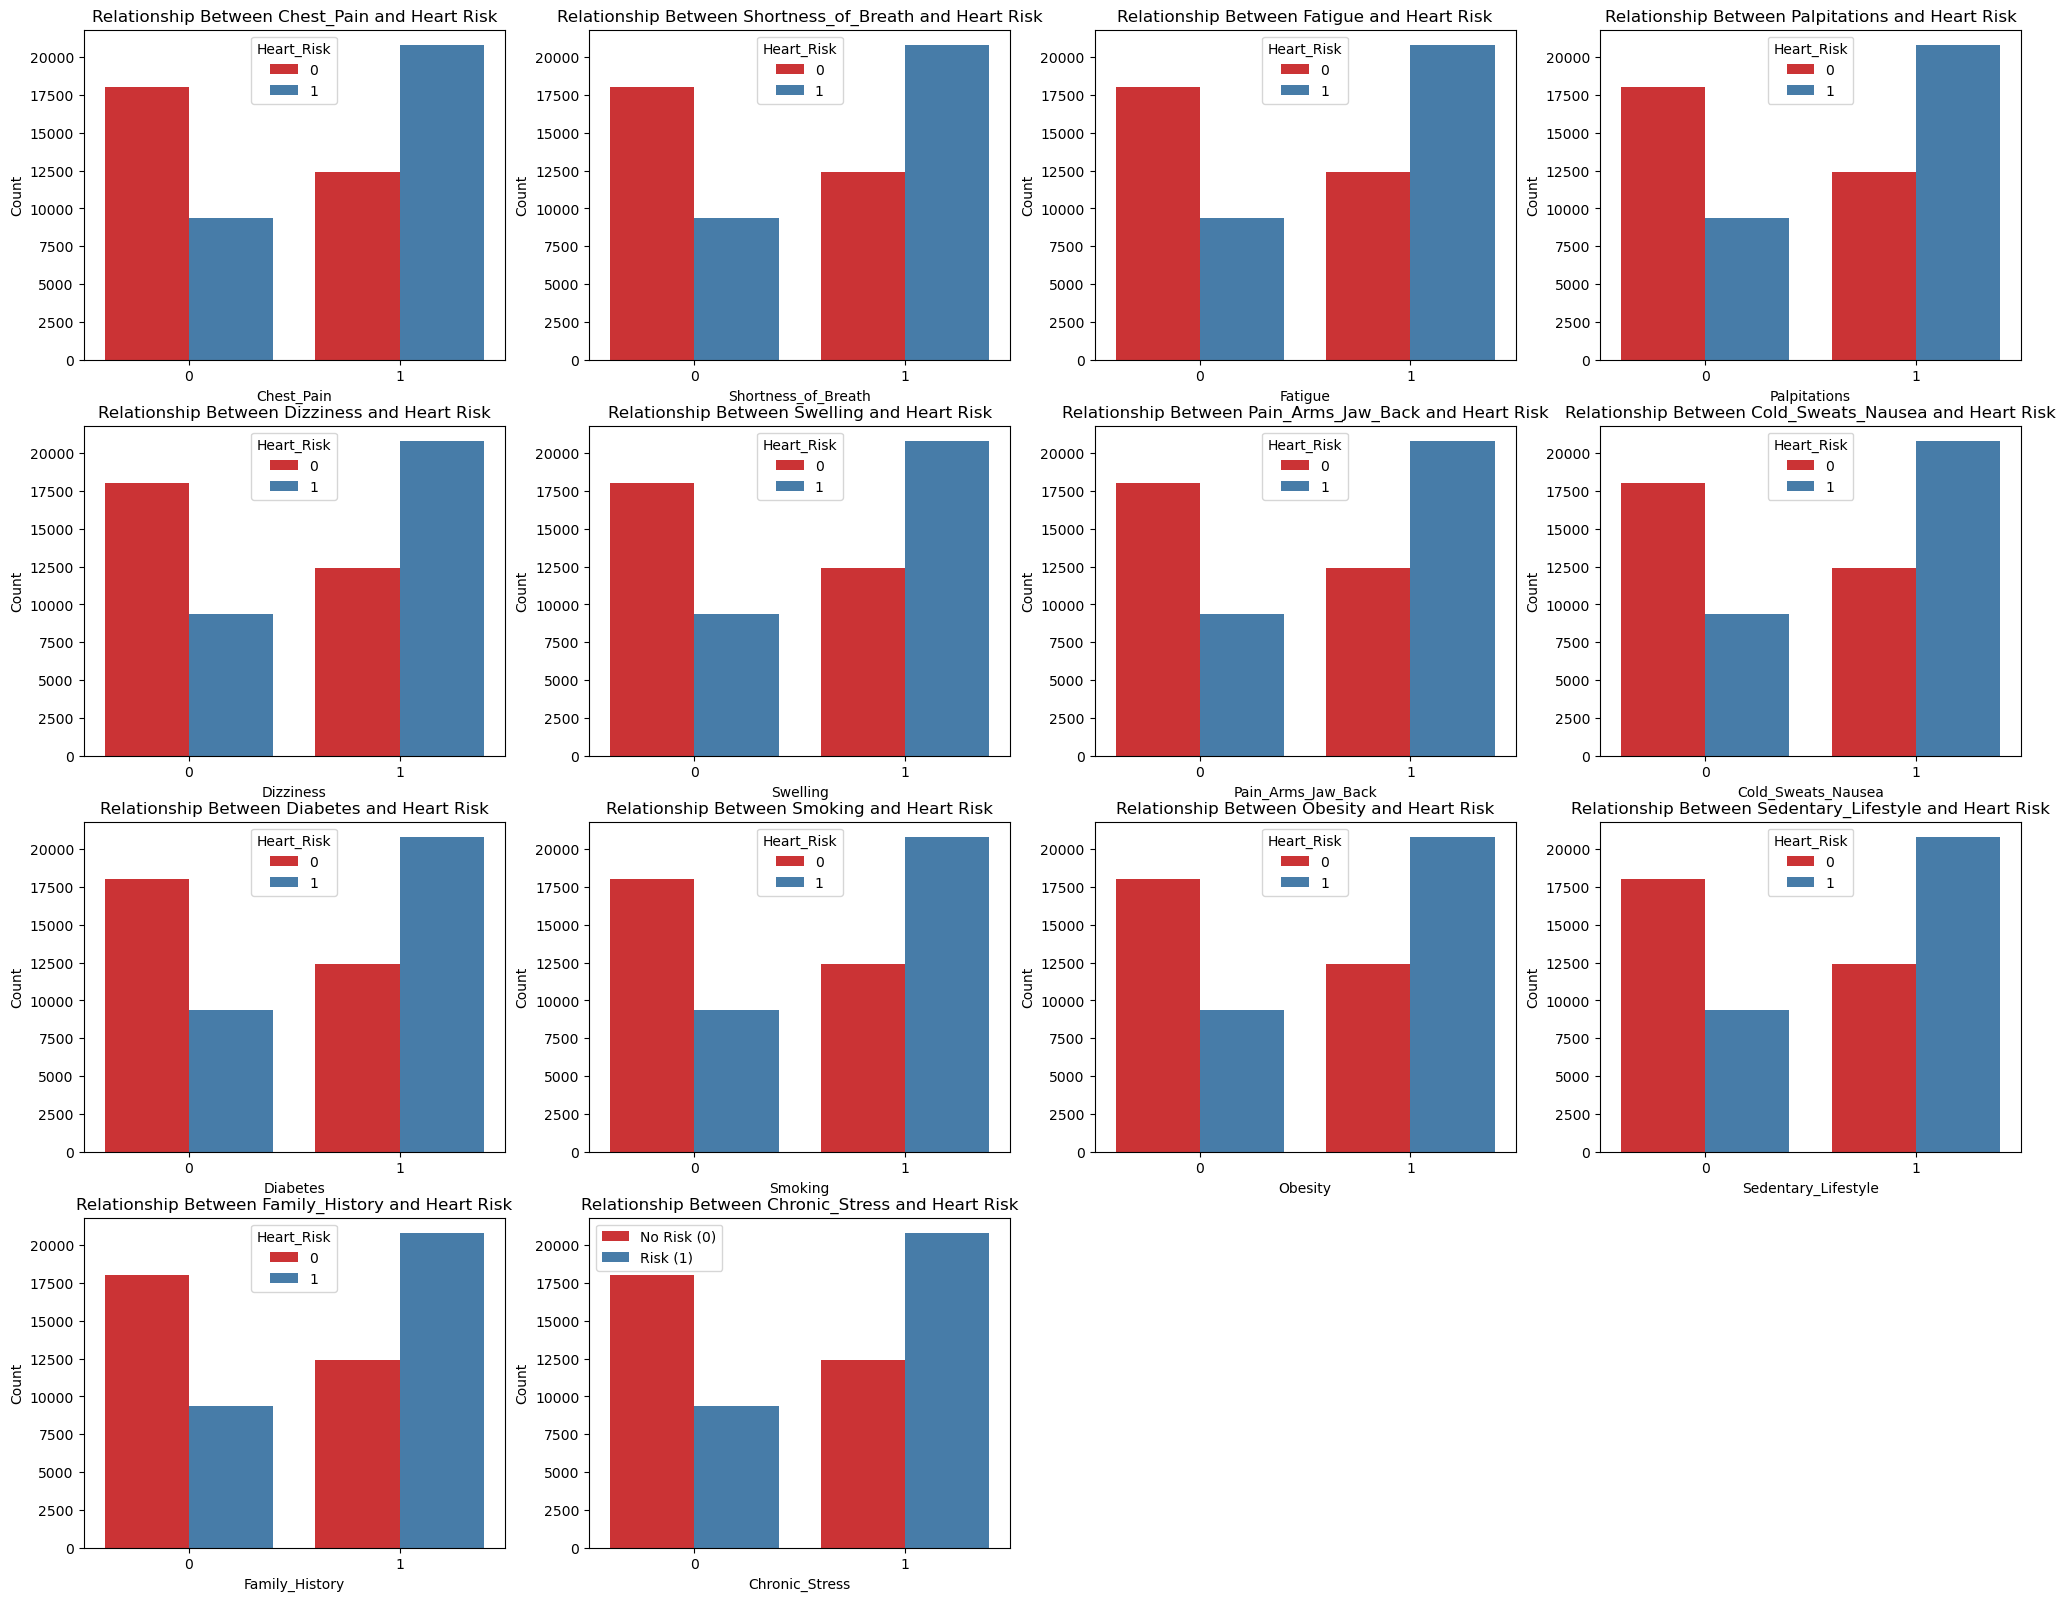

In [37]:

categorical_columns = ['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 'Dizziness',
                       'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea', 'Diabetes', 'Smoking',
                       'Obesity', 'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress']

plt.figure(figsize=(25, 30))

for i, col in enumerate(categorical_columns, 1):

    plt.subplot(6,4, i)
    sns.countplot(x='Gender', hue='Heart_Risk', data=df, palette='Set1')
    plt.title(f'Relationship Between {col} and Heart Risk')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.legend(['No Risk (0)', 'Risk (1)'])
plt.show()



All of these factors clearly influence the risk of heart disease, with the following columns showing a significant association with increased risk:

- Smoking, obesity, diabetes, family history, and sedentary lifestyle
- Symptoms such as chest pain, shortness of breath, and heart palpitations

In [38]:
print(df.columns)

Index(['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations',
       'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea',
       'High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity',
       'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender',
       'Age', 'Heart_Risk', 'Age_Binned'],
      dtype='object')


In [39]:
df = df.drop('Age_Binned', axis=1, errors='ignore')


In [40]:
import plotly.express as px

corr = df.corr()['Heart_Risk'].drop('Heart_Risk').sort_values(ascending=False)
fig = px.bar(corr, x=corr.values, y=corr.index,
             title="Feature Correlation with Heart Risk",
             orientation='h')
fig.show(renderer="browser")


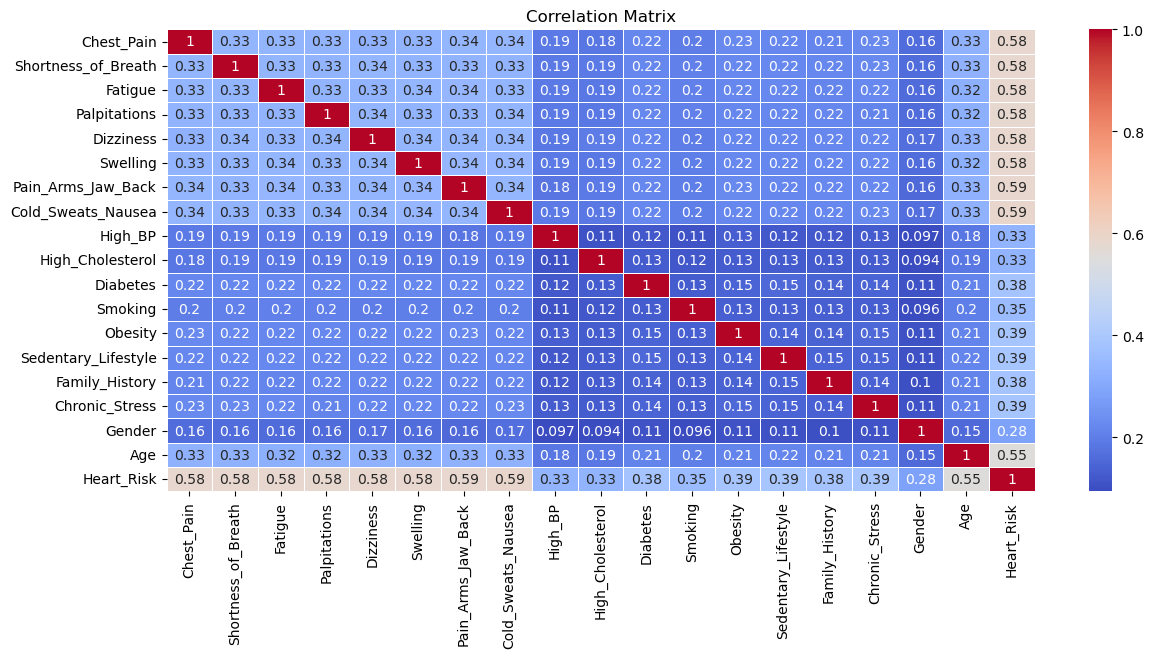

In [41]:
corr_matrix = df.corr()
plt.figure(figsize=(14, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

- Physical symptoms (such as cold sweats, nausea, chest pain, shortness of breath) are the strongest indicators of heart disease risk.
- Age, sedentary lifestyle and obesity are important, but their impact is less compared to direct symptoms.
- Chronic diseases such as diabetes, hypertension and family history have a moderate impact.
- Smoking is a risk factor but less important than other factors in this group.

### Analytical questions

#### Is there a relationship between Age and heart risk?


In [42]:
grouped_stats = df.groupby('Heart_Risk')['Age'].agg(['count', 'mean', 'std', 'min', 'max']).reset_index()
print(grouped_stats)

   Heart_Risk  count       mean        std   min   max
0           0  30452  46.387823  13.857814  20.0  69.0
1           1  30146  62.973396  10.970959  45.0  84.0


In [43]:
risk_0 = df[df['Heart_Risk'] == 0]['Age']
risk_1 = df[df['Heart_Risk'] == 1]['Age']
t_stat, p_val = ttest_ind(risk_0, risk_1)
print(f"\nT-test: t-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")


T-test: t-statistic = -163.24, p-value = 0.0000


People with a higher risk of heart disease tend to age higher, 
<br>and the difference in age between the two groups 
is statistically significant, meaning it's not just a coincidence.


#### Are people suffering from Chronic Stress at greater risk?

In [44]:
count_table = pd.crosstab(df['Chronic_Stress'], df['Heart_Risk'], margins=True)
count_table.columns = ['Heart_Risk = 0', 'Heart_Risk = 1', 'Total']
count_table.index = ['No Stress', 'Stress', 'Total']
count_table

,Heart_Risk = 0,Heart_Risk = 1,Total
No Stress,21093,9260,30353
Stress,9359,20886,30245
Total,30452,30146,60598


In [45]:
risk_rates = df.groupby('Chronic_Stress')['Heart_Risk'].mean() * 100
print(risk_rates)

Chronic_Stress
0    30.507693
1    69.056042
Name: Heart_Risk, dtype: float64


In [46]:
table = pd.crosstab(df['Chronic_Stress'], df['Heart_Risk'])
chi2, p, dof, expected = chi2_contingency(table)

print(f"Chi-square = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("There is a statistically significant relationship between Chronic Stress and Heart Risk.")
else:
    print("No statistically significant relationship found.")


Chi-square = 9003.37, p-value = 0.0000
There is a statistically significant relationship between Chronic Stress and Heart Risk.


#### Does a sedentary lifestyle clearly show with obesity and heart risks?

In [47]:
table_sedentary_obesity_heart = pd.crosstab([df['Sedentary_Lifestyle'], df['Obesity']], df['Heart_Risk'], margins=True)
table_sedentary_obesity_heart.columns = ['No Heart Risk', 'Heart Risk', 'Total']
table_sedentary_obesity_heart.index = ['Active & No Obesity', 'Active & Obesity', 'Sedentary & No Obesity', 'Sedentary & Obesity', 'Total']

table_sedentary_obesity_heart

,No Heart Risk,Heart Risk,Total
Active & No Obesity,14552,2754,17306
Active & Obesity,6464,6353,12817
Sedentary & No Obesity,6575,6533,13108
Sedentary & Obesity,2861,14506,17367
Total,30452,30146,60598


In [48]:
chi2_sedentary_obesity_heart, p_sedentary_obesity_heart, dof_sedentary_obesity_heart, expected_sedentary_obesity_heart = chi2_contingency(table_sedentary_obesity_heart.iloc[:-1, :-1])

print(f"\nChi-square for Sedentary Lifestyle, Obesity vs Heart Risk: chi2 = {chi2_sedentary_obesity_heart:.2f}, p-value = {p_sedentary_obesity_heart:.4f}")
if p_sedentary_obesity_heart < 0.05:
    print("There is a statistically significant relationship between Sedentary Lifestyle, Obesity, and Heart Risk.")
else:
    print("No statistically significant relationship found.")



Chi-square for Sedentary Lifestyle, Obesity vs Heart Risk: chi2 = 15851.25, p-value = 0.0000
There is a statistically significant relationship between Sedentary Lifestyle, Obesity, and Heart Risk.


#### Are people with a family history of heart diseases more prone to develop them?

In [49]:
table = pd.crosstab(df['Family_History'], df['Heart_Risk'], margins=True)
table.columns = ['No Heart Risk', 'Heart Risk', 'Total']
table.index = ['No Family History', 'Family History', 'Total']
table

,No Heart Risk,Heart Risk,Total
No Family History,21121,9389,30510
Family History,9331,20757,30088
Total,30452,30146,60598


In [50]:
df.groupby('Family_History')['Heart_Risk'].mean()


Family_History
0    0.307735
1    0.689876
Name: Heart_Risk, dtype: float64

In [51]:
chi2_table = pd.crosstab(df['Family_History'], df['Heart_Risk'])
chi2, p, dof, expected = chi2_contingency(chi2_table)

print(f"Chi-square = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("There is a statistically significant relationship between family history and heart risk.")
else:
    print("No statistically significant relationship found between family history and heart risk.")


Chi-square = 8847.51, p-value = 0.0000
There is a statistically significant relationship between family history and heart risk.


People with a family history of heart disease are more likely to actually develop it, and the relationship is not random but statistically supported.

#### Is the breathing problem associated with a greater risk of heart diseases?

In [52]:
table = pd.crosstab(df['Shortness_of_Breath'], df['Heart_Risk'], margins=True)
table.columns = ['No Heart Risk', 'Heart Risk', 'Total']
table.index = ['No Shortness of Breath', 'Has Shortness of Breath', 'Total']
table

,No Heart Risk,Heart Risk,Total
No Shortness of Breath,24112,6299,30411
Has Shortness of Breath,6340,23847,30187
Total,30452,30146,60598


In [53]:
chi2_table = pd.crosstab(df['Shortness_of_Breath'], df['Heart_Risk'])
chi2, p, dof, expected = chi2_contingency(chi2_table)

print(f"Chi-square = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("There is a statistically significant relationship between shortness of breath and heart risk.")
else:
    print("No statistically significant relationship found between shortness of breath and heart risk.")

Chi-square = 20583.68, p-value = 0.0000
There is a statistically significant relationship between shortness of breath and heart risk.


There is a strong relationship between shortness of breath and an increased risk of heart disease. People who experience these symptoms are more likely to be affected, according to statistical analysis.

#### Are people who experience chest pain more likely to have heart problems?

In [54]:
table = pd.crosstab(df['Chest_Pain'], df['Heart_Risk'], margins=True)
table.columns = ['No Heart Risk', 'Heart Risk', 'Total']
table.index = ['No Chest Pain', 'Has Chest Pain', 'Total']
table

,No Heart Risk,Heart Risk,Total
No Chest Pain,24148,6343,30491
Has Chest Pain,6304,23803,30107
Total,30452,30146,60598


In [55]:
chi2_table = pd.crosstab(df['Chest_Pain'], df['Heart_Risk'])
chi2, p, dof, expected = chi2_contingency(chi2_table)

print(f"Chi-square = {chi2:.2f}, p-value = {p:.4f}")
if p < 0.05:
    print("There is a statistically significant relationship between chest pain and heart risk.")
else:
    print("No statistically significant relationship found between chest pain and heart risk.")

Chi-square = 20564.64, p-value = 0.0000
There is a statistically significant relationship between chest pain and heart risk.


Individuals who suffer from chest pain (Chest_Pain = 1) are more likely to develop heart diseases compared to those who do not experience this symptom. The relationship is not random, but is supported by strong statistics (p-value < 0.05).

#### What are the most common characteristics among those affected?

In [56]:
affected = df[df['Heart_Risk'] == 1]

columns = [
    'Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 'Dizziness',
    'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea', 'High_BP', 'High_Cholesterol',
    'Diabetes', 'Smoking', 'Obesity', 'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress'
]

common_symptoms = affected[columns].mean().sort_values(ascending=False) * 100
print(common_symptoms)


Cold_Sweats_Nausea     79.463279
Pain_Arms_Jaw_Back     79.363763
Dizziness              79.333908
Shortness_of_Breath    79.105022
Swelling               79.028727
Chest_Pain             78.959066
Fatigue                78.955749
Palpitations           78.776620
Sedentary_Lifestyle    69.790354
Diabetes               69.335899
Chronic_Stress         69.282824
Obesity                69.193259
Family_History         68.854906
Smoking                63.318517
High_Cholesterol       58.465468
High_BP                58.389173
dtype: float64


Traits with a high attribution (greater than 70%) are considered common patterns among the affected individuals and deserve focus when building the prediction model.

#### Are those who suffer from chronic stress and obesity together at greater risk than those who suffer from only one of them?

In [57]:
df['Stress_Obesity_Group'] = df['Chronic_Stress'].astype(str) + df['Obesity'].astype(str)
df['Stress_Obesity_Group'] = df['Stress_Obesity_Group'].map({
    '00': 'None',
    '10': 'Chronic Stress Only',
    '01': 'Obesity Only',
    '11': 'Both'
})
grouped = df.groupby('Stress_Obesity_Group')['Heart_Risk'].agg(['count', 'sum', 'mean'])
grouped.columns = ['Total', 'Heart Cases', 'Heart Risk Rate']
grouped.sort_values('Heart Risk Rate', ascending=False)


,Total,Heart Cases,Heart Risk Rate
Stress_Obesity_Group,,,
Both,17343,14475,0.834631
Obesity Only,12841,6384,0.497158
Chronic Stress Only,12902,6411,0.496900
None,17512,2876,0.164230


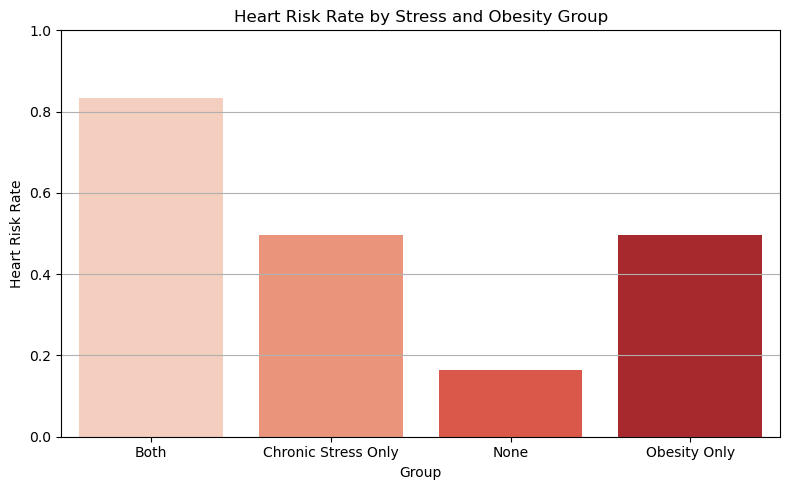

In [58]:
grouped = df.groupby('Stress_Obesity_Group')['Heart_Risk'].agg(['count', 'sum', 'mean'])
grouped = grouped.reset_index()
grouped.columns = ['Group', 'Total', 'Heart Cases', 'Heart Risk Rate']


plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='Group', y='Heart Risk Rate', hue='Group', palette='Reds', legend=False)
plt.title('Heart Risk Rate by Stress and Obesity Group')
plt.xlabel('Group')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


People who suffer from chronic stress and obesity together are more likely to develop heart disease compared to those who suffer from only one of them or do not suffer from either.

#### Does the relationship between obesity and heart risk vary by gender?

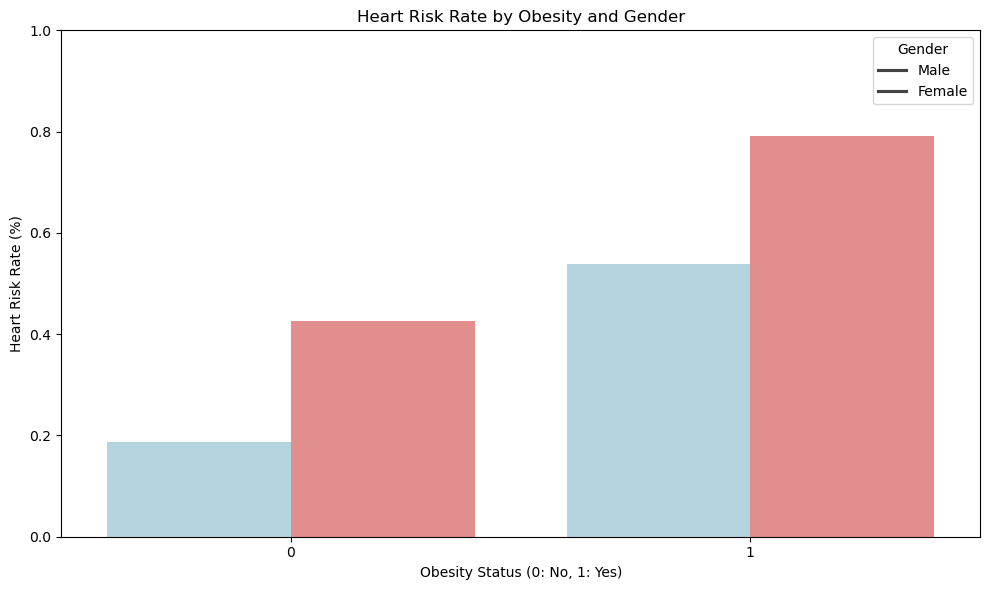

In [59]:
grouped_gender = df.groupby(['Gender', 'Obesity'])['Heart_Risk'].agg(['count', 'sum', 'mean']).reset_index()


grouped_gender.columns = ['Gender', 'Obesity', 'Total', 'Heart Cases', 'Heart Risk Rate']

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_gender, x='Obesity', y='Heart Risk Rate', hue='Gender', palette={0: 'lightblue', 1: 'lightcoral'})

plt.title('Heart Risk Rate by Obesity and Gender')
plt.xlabel('Obesity Status (0: No, 1: Yes)')
plt.ylabel('Heart Risk Rate (%)')
plt.ylim(0, 1)
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.tight_layout()
plt.show()


#### Are individuals experiencing chest pain + palpitations + dizziness at a higher risk of heart problems than others?

In [60]:
risk_with_symptoms = df[(df['Chest_Pain'] == 1) & (df['Palpitations'] == 1) & (df['Dizziness'] == 1)]

risk_percentage = (risk_with_symptoms['Heart_Risk'].sum() / len(risk_with_symptoms)) * 100

print(f"\nPercentage of individuals with Chest Pain, Palpitations, and Dizziness at high Heart Risk: {risk_percentage:.2f}%")



Percentage of individuals with Chest Pain, Palpitations, and Dizziness at high Heart Risk: 98.61%


#### Are the younger age group (under 30) who suffer from risk factors (such as obesity or stress) at risk of early onset?

In [61]:
younger_group = df[df['Age'] < 30]

risk_factors = younger_group[(younger_group['Obesity'] == 1) | (younger_group['Chronic_Stress'] == 1)]

early_risk_percentage = (risk_factors['Heart_Risk'].sum() / len(risk_factors)) * 100

print(f"Percentage of individuals under 30 with risk factors (Obesity or Stress) at high heart risk: {early_risk_percentage:.2f}%")

Percentage of individuals under 30 with risk factors (Obesity or Stress) at high heart risk: 0.00%


<Axes: xlabel='Age_Group'>

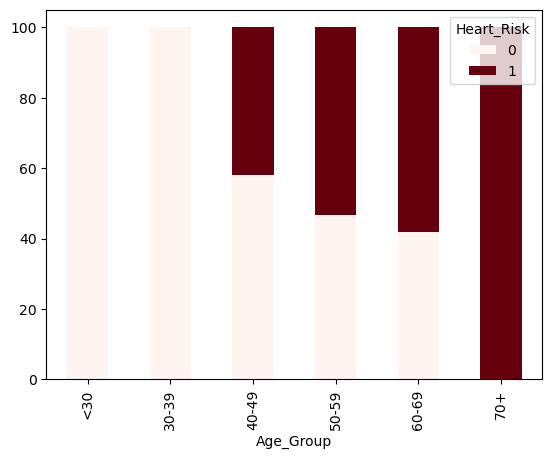

In [62]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0,30,40,50,60,70,100],
                         labels=['<30','30-39','40-49','50-59','60-69','70+'])
crosstab = pd.crosstab(df['Age_Group'], df['Heart_Risk'], normalize='index') * 100
crosstab.plot(kind='bar', stacked=True, colormap='Reds')


#### Do people with 3 or more risk factors (such as obesity + smoking + stress) have much higher risk rates?

In [63]:
risk_factors_columns = ['Obesity', 'Smoking', 'Chronic_Stress', 'High_BP', 'High_Cholesterol']

df['Risk_Factor_Count'] = df[risk_factors_columns].sum(axis=1)

high_risk_individuals = df[df['Risk_Factor_Count'] >= 3]

high_risk_percentage = (high_risk_individuals['Heart_Risk'].sum() / len(high_risk_individuals)) * 100

print(f"Percentage of individuals with 3 or more risk factors at high heart risk: {high_risk_percentage:.2f}%")


Percentage of individuals with 3 or more risk factors at high heart risk: 84.30%


#### Are there young individuals without risk factors but who are infected?

In [64]:
younger_group = df[df['Age'] < 30]

risk_factors_columns = ['Obesity', 'Smoking', 'Chronic_Stress', 'High_BP', 'High_Cholesterol']

no_risk_factors = younger_group[(younger_group[risk_factors_columns].sum(axis=1) == 0)]

infected_no_risk = no_risk_factors[no_risk_factors['Heart_Risk'] == 1]

print(f"Number of young individuals (under 30) without risk factors but infected: {len(infected_no_risk)}")


Number of young individuals (under 30) without risk factors but infected: 0


#### There are elderly people who do not suffer from danger despite the presence of factors?

In [65]:
elderly_group = df[df['Age'] >= 60]

risk_factors_columns = ['Obesity', 'Smoking', 'Chronic_Stress', 'High_BP', 'High_Cholesterol']

elderly_with_risk_factors = elderly_group[elderly_group[risk_factors_columns].sum(axis=1) > 0]

elderly_no_risk = elderly_with_risk_factors[elderly_with_risk_factors['Heart_Risk'] == 0]

print(f"Number of elderly individuals (60+) with risk factors but no heart risk: {len(elderly_no_risk)}")


Number of elderly individuals (60+) with risk factors but no heart risk: 4072


In [66]:
from itertools import combinations

risk_factors = [
    'Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations', 'Dizziness', 'Swelling',
    'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea', 'High_BP', 'High_Cholesterol',
    'Smoking', 'Obesity', 'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress'
]

infected = df[df['Heart_Risk'] == 1]

# Store counts of combinations
from collections import Counter
combo_counter = Counter()

# Loop through infected people and count combinations of 2 or 3 active (value=1) risk factors
for _, row in infected.iterrows():
    active_factors = [factor for factor in risk_factors if row[factor] == 1]
    for r in [2, 3]:  # check pairs and triplets
        combos = combinations(active_factors, r)
        combo_counter.update(combos)

# Show the top 10 most frequent combinations among infected
print("Top combinations of risk factors among infected individuals:")
for combo, count in combo_counter.most_common(10):
    print(f"{combo} -> {count} individuals")



Top combinations of risk factors among infected individuals:
('Dizziness', 'Cold_Sweats_Nausea') -> 18998 individuals
('Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea') -> 18989 individuals
('Dizziness', 'Pain_Arms_Jaw_Back') -> 18968 individuals
('Swelling', 'Pain_Arms_Jaw_Back') -> 18929 individuals
('Fatigue', 'Pain_Arms_Jaw_Back') -> 18919 individuals
('Swelling', 'Cold_Sweats_Nausea') -> 18916 individuals
('Chest_Pain', 'Cold_Sweats_Nausea') -> 18902 individuals
('Shortness_of_Breath', 'Dizziness') -> 18898 individuals
('Dizziness', 'Swelling') -> 18895 individuals
('Fatigue', 'Dizziness') -> 18881 individuals


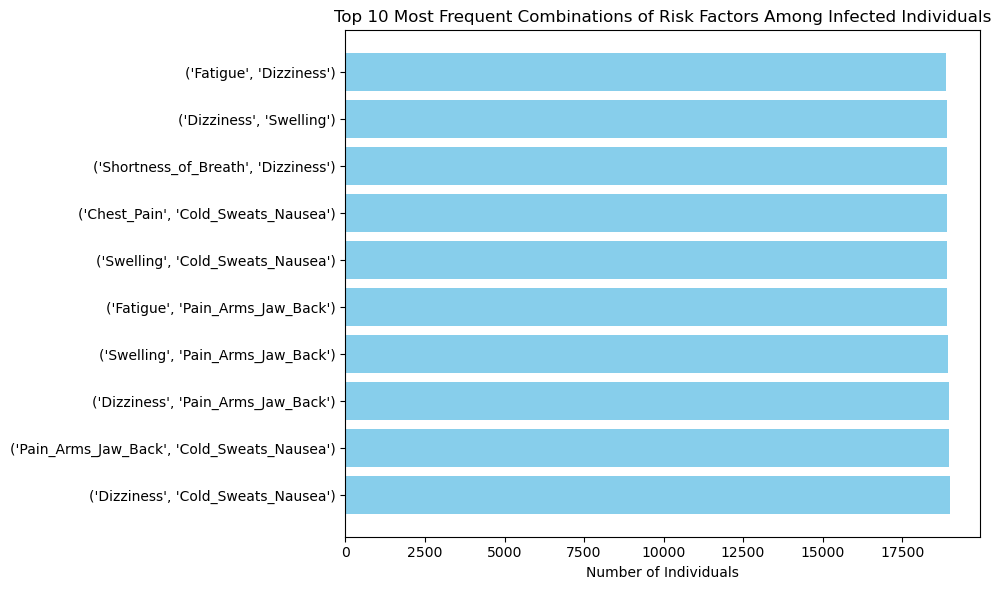

In [67]:
top_combos = combo_counter.most_common(10)
combos = [str(combo) for combo, _ in top_combos]
counts = [count for _, count in top_combos]

plt.figure(figsize=(10, 6))
plt.barh(combos, counts, color='skyblue')
plt.xlabel('Number of Individuals')
plt.title('Top 10 Most Frequent Combinations of Risk Factors Among Infected Individuals')
plt.tight_layout()
plt.show()


- Relatively "unusual" combinations: Swelling + Cold Sweats/Nausea → Although the symptoms can be serious, they are not commonly directly related to each other.
- Dizziness + Swelling → They do not usually appear together as a clear set of symptoms of one disease.

### feature importance 

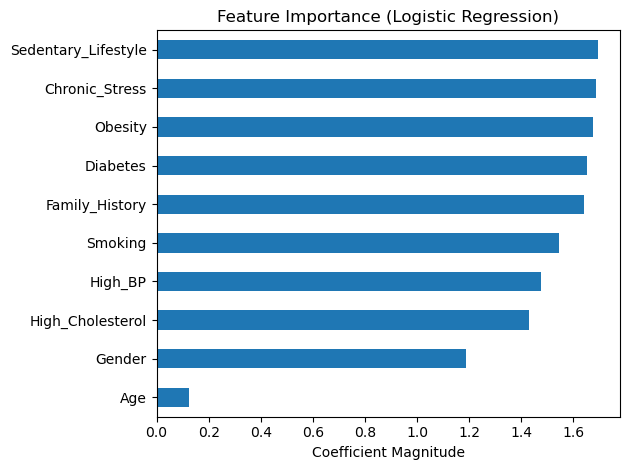

In [68]:
from sklearn.linear_model import LogisticRegression


features = ['Age', 'High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking',
            'Obesity', 'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender']
X = df[features].fillna(0)
y = df['Heart_Risk']

model = LogisticRegression(random_state=42)
model.fit(X, y)

importances = pd.Series(abs(model.coef_[0]), index=features)
importances.sort_values(ascending=True).plot(kind='barh', title="Feature Importance (Logistic Regression)")
plt.xlabel("Coefficient Magnitude")
plt.tight_layout()
plt.show()


### Heart Risk Dashboard

In [70]:
import dash
from dash import dcc, html
import plotly.graph_objects as go
import pandas as pd
from dash.dependencies import Input, Output

df['Age_Binned'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80, 90],
                          labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])

app = dash.Dash(__name__)

card_style = {
    'boxShadow': '0px 2px 6px rgba(0,0,0,0.1)',
    'border': '1px solid #e1e1e1',
    'borderRadius': '8px',
    'padding': '8px',
    'margin': '6px',
    'backgroundColor': '#ffffff'
}

app.layout = html.Div([
    html.H1("Heart Risk Dashboard", style={'textAlign': 'center'}),

    html.Div([
        html.Div([
            html.Label("Select Gender:"),
            dcc.Dropdown(
                id='gender-dropdown',
                options=[
                    {'label': 'All', 'value': 'All'},
                    {'label': 'Male', 'value': 1},
                    {'label': 'Female', 'value': 0}
                ],
                value='All'
            )
        ], style={'width': '30%', 'display': 'inline-block', 'marginRight': '2%'}),

        html.Div([
            html.Label("Select Heart Risk:"),
            dcc.Dropdown(
                id='heart-risk-dropdown',
                options=[
                    {'label': 'All', 'value': 'All'},
                    {'label': 'No Risk (0)', 'value': 0},
                    {'label': 'Risk (1)', 'value': 1}
                ],
                value='All'
            )
        ], style={'width': '30%', 'display': 'inline-block', 'marginRight': '2%'}),

        html.Div([
            html.Label("Select Health Factor:"),
            dcc.Dropdown(
                id='health-factor-dropdown',
                options=[
                    {'label': 'All', 'value': 'All'},
                    {'label': 'High Blood Pressure', 'value': 'High_BP'},
                    {'label': 'Diabetes', 'value': 'Diabetes'},
                    {'label': 'Obesity', 'value': 'Obesity'},
                    {'label': 'Smoking', 'value': 'Smoking'}
                ],
                value='All'
            )
        ], style={'width': '30%', 'display': 'inline-block'}),

        html.Button('Reset Filters', id='reset-button', n_clicks=0, style={
            'marginTop': '10px',
            'marginLeft': '10px',
            'padding': '6px 12px',
            'backgroundColor': '#f44336',
            'color': 'white',
            'border': 'none',
            'borderRadius': '5px',
            'cursor': 'pointer'
        }),
    ], style={'marginBottom': '20px'}),

    # Row 1
    html.Div([
        html.Div(dcc.Graph(id='gender-graph', style={'height': '300px'}), style={**card_style, 'width': '45%', 'display': 'inline-block'}),
        html.Div(dcc.Graph(id='age-risk-graph', style={'height': '300px'}), style={**card_style, 'width': '45%', 'display': 'inline-block'}),
    ], style={'display': 'flex', 'justifyContent': 'space-around', 'marginBottom': '20px'}),

    # Row 2
    html.Div([
        html.Div(dcc.Graph(id='factor-risk-graph', style={'height': '300px'}), style={**card_style, 'width': '45%', 'display': 'inline-block'}),
        html.Div(dcc.Graph(id='heart-risk-graph', style={'height': '300px'}), style={**card_style, 'width': '45%', 'display': 'inline-block'}),
    ], style={'display': 'flex', 'justifyContent': 'space-around'}),
])

@app.callback(
    [Output('gender-graph', 'figure'),
     Output('age-risk-graph', 'figure'),
     Output('factor-risk-graph', 'figure'),
     Output('heart-risk-graph', 'figure'),
     Output('gender-dropdown', 'value'),
     Output('heart-risk-dropdown', 'value'),
     Output('health-factor-dropdown', 'value')],
    [Input('gender-dropdown', 'value'),
     Input('heart-risk-dropdown', 'value'),
     Input('health-factor-dropdown', 'value'),
     Input('reset-button', 'n_clicks')]
)
def update_graphs(gender, risk, factor, n_clicks):
    ctx = dash.callback_context
    triggered_id = ctx.triggered[0]['prop_id'].split('.')[0] if ctx.triggered else None

    # Reset filters
    if triggered_id == 'reset-button':
        gender = 'All'
        risk = 'All'
        factor = 'All'

    filtered = df.copy()

    if gender != 'All':
        filtered = filtered[filtered['Gender'] == gender]
    if risk != 'All':
        filtered = filtered[filtered['Heart_Risk'] == risk]
    if factor != 'All' and factor in df.columns:
        filtered = filtered[filtered[factor] == 1]

    # Gender Graph
    gender_counts = filtered['Gender'].value_counts()
    gender_fig = go.Figure(data=[
        go.Pie(
            labels=['Male', 'Female'],
            values=[gender_counts.get(1, 0), gender_counts.get(0, 0)],
            hole=0.4,
            marker=dict(colors=['#1f77b4', '#ff7f0e'])
        )
    ])
    gender_fig.update_layout(title='Gender Distribution', margin=dict(t=30, b=0))

    # Age Risk Graph
    if not filtered.empty:
        age_risk_counts = filtered.groupby(['Age_Binned', 'Heart_Risk']).size().unstack(fill_value=0)
        age_risk_percent = age_risk_counts.div(age_risk_counts.sum(axis=1), axis=0) * 100
        age_fig = go.Figure(data=[
            go.Bar(name='No Risk', x=age_risk_percent.index, y=age_risk_percent.get(0, [0]*len(age_risk_percent)), marker_color='#66b3ff'),
            go.Bar(name='Risk', x=age_risk_percent.index, y=age_risk_percent.get(1, [0]*len(age_risk_percent)), marker_color='#ff66b3')
        ])
        age_fig.update_layout(barmode='group', title='Heart Risk by Age Group', margin=dict(t=30, b=30))
    else:
        age_fig = go.Figure()
        age_fig.add_annotation(text="No Data Available", x=0.5, y=0.5, showarrow=False)
        age_fig.update_layout(title="Heart Risk by Age Group")

    # Factor Graph
    factor_fig = go.Figure()
    if factor == 'All':
        for f in ['High_BP', 'Diabetes', 'Obesity', 'Smoking']:
            if f in df.columns:
                counts = df[f].value_counts()
                yes = counts.get(1, 0)
                no = counts.get(0, 0)
                factor_fig.add_trace(go.Bar(
                    x=['Yes', 'No'],
                    y=[yes, no],
                    name=f,
                ))
        factor_fig.update_layout(title="Health Factors Distribution", barmode='group', margin=dict(t=30, b=30))
    elif factor in df.columns:
        counts = filtered[factor].value_counts()
        yes = counts.get(1, 0)
        no = counts.get(0, 0)
        factor_fig.add_trace(go.Bar(
            x=['Yes', 'No'],
            y=[yes, no],
            marker_color='indianred'
        ))
        factor_fig.update_layout(title=f"{factor} Distribution", margin=dict(t=30, b=30))
    else:
        factor_fig.add_annotation(text="No Data Available", x=0.5, y=0.5, showarrow=False)
        factor_fig.update_layout(title="Health Factor Overview")

    # Heart Risk Graph
    risk_counts = filtered['Heart_Risk'].value_counts()
    heart_fig = go.Figure(data=[
        go.Bar(x=['No Risk', 'Risk'],
               y=[risk_counts.get(0, 0), risk_counts.get(1, 0)],
               marker_color=['#66b3ff', '#ff66b3'])
    ])
    heart_fig.update_layout(title='Heart Risk Count', margin=dict(t=30, b=30))

    return gender_fig, age_fig, factor_fig, heart_fig, gender, risk, factor


if __name__ == '__main__':
    app.run(debug=True,port=8050)


### Modeling

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

In [75]:
df=df.drop(['Stress_Obesity_Group','Age_Group','Age_Binned'],axis=1)

In [76]:
df

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk,Risk_Factor_Count
0,0,0,0,1,0,0,0,0,0.0,0.0,0,1,0,1,0,0,0,-0.442440,0,1.0
2,1,0,0,1,0,0,0,0,1.0,1.0,0,1,1,1,0,0,1,0.757174,0,4.0
4,0,0,1,0,1,0,0,0,0.0,0.0,1,0,0,0,0,0,0,0.957110,0,0.0
5,1,1,0,1,1,1,1,0,1.0,1.0,1,0,0,1,1,0,1,0.090722,1,2.0
6,1,1,1,1,1,1,1,1,0.0,0.0,1,1,1,1,1,0,1,-0.242504,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72064,0,0,0,0,0,0,0,0,1.0,1.0,1,0,0,0,0,0,1,0.890465,0,2.0
72083,1,1,0,1,0,1,1,1,1.0,1.0,1,0,0,1,1,0,1,0.757174,1,2.0
72084,0,0,1,0,1,1,1,1,1.0,1.0,0,0,1,0,1,1,1,1.690207,1,4.0
72093,1,1,1,1,1,1,1,1,1.0,0.0,1,1,1,1,1,1,1,0.490593,1,4.0


In [77]:
from sklearn.model_selection import train_test_split

# Splitting the data into X (features) and y (target)
X = df.drop('Heart_Risk', axis=1)
y = df['Heart_Risk']

# Splitting the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Defining the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
}

# Training the models and evaluating them
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions on the test set

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")  # Print accuracy
    print(f"Classification Report:\n {classification_report(y_test, y_pred)}")  # Print classification report
    print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")  # Print confusion matrix
    print("="*50)  # Print a separator line


Model: Logistic Regression
Accuracy: 0.9902640264026402
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6123
           1       0.99      0.99      0.99      5997

    accuracy                           0.99     12120
   macro avg       0.99      0.99      0.99     12120
weighted avg       0.99      0.99      0.99     12120

Confusion Matrix:
 [[6062   61]
 [  57 5940]]
Model: Random Forest
Accuracy: 0.9904290429042905
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6123
           1       0.99      0.99      0.99      5997

    accuracy                           0.99     12120
   macro avg       0.99      0.99      0.99     12120
weighted avg       0.99      0.99      0.99     12120

Confusion Matrix:
 [[6067   56]
 [  60 5937]]
Model: SVM
Accuracy: 0.9903465346534653
Classification Report:
               precision    recall  f

c:\Users\alaa\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\alaa\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\alaa\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alaa\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\alaa\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, arg

Model: KNN
Accuracy: 0.9887788778877887
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6123
           1       0.99      0.99      0.99      5997

    accuracy                           0.99     12120
   macro avg       0.99      0.99      0.99     12120
weighted avg       0.99      0.99      0.99     12120

Confusion Matrix:
 [[6051   72]
 [  64 5933]]


In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the Logistic Regression model
log_reg = LogisticRegression()

# Specify the parameters to test
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter (C)
    'solver': ['liblinear', 'saga'],  # Solver selection
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the model using the best parameters
best_log_reg = grid_search.best_estimator_
y_pred = best_log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after hyperparameter tuning: {accuracy}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'C': 10, 'max_iter': 100, 'solver': 'saga'}
Accuracy after hyperparameter tuning: 0.9903465346534653


In [79]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_log_reg, X, y, cv=5)
print(f"Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Cross-Validation Accuracy: 0.9899 ± 0.0006


### Deployment

In [80]:
import joblib

# Save the trained model
joblib.dump(best_log_reg, 'final_logistic_regression_model.pkl')

['final_logistic_regression_model.pkl']

In [ ]:
!streamlit run app.py

In [82]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mlflow import MlflowClient

mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("experiment2")
client = MlflowClient()

with mlflow.start_run(run_name="All Models Comparison"):
    for name, model in models.items():
        with mlflow.start_run(run_name=name, nested=True):
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # Log parameters
            mlflow.log_param("model_name", name)
            mlflow.log_param("algorithm", name)

            # Log metrics
            accuracy = accuracy_score(y_test, y_pred)
            mlflow.log_metric("accuracy", accuracy)

            # Log the model
            mlflow.sklearn.log_model(model, "model")

            # Register model
            model_uri = f"runs:/{mlflow.active_run().info.run_id}/model"
            result = mlflow.register_model(model_uri=model_uri, name=name)
            version = result.version

            # Log classification report
            report = classification_report(y_test, y_pred, output_dict=True)
            report_df = pd.DataFrame(report).transpose()
            report_path = f"classification_report_{name}.csv"
            report_df.to_csv(report_path)
            mlflow.log_artifact(report_path)

            # Log confusion matrix
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(6, 4))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
            plt.title(f"Confusion Matrix - {name}")
            plt.xlabel("Predicted")
            plt.ylabel("Actual")
            cm_path = f"confusion_matrix_{name}.png"
            plt.savefig(cm_path)
            mlflow.log_artifact(cm_path)
            plt.close()

mlflow.end_run()


2025/05/15 17:31:29 INFO mlflow.tracking.fluent: Experiment with name 'experiment2' does not exist. Creating a new experiment.


2025/05/15 17:31:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Logistic Regression'.
2025/05/15 17:31:44 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Logistic Regression, version 1
Created version '1' of model 'Logistic Regression'.


🏃 View run Logistic Regression at: http://127.0.0.1:5000/#/experiments/259638989825530334/runs/f615fae728864a9c88497ee3ef97dcf1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/259638989825530334


2025/05/15 17:31:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Random Forest'.
2025/05/15 17:31:58 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest, version 1
Created version '1' of model 'Random Forest'.


🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/259638989825530334/runs/24951a091b414ca68ca9a0a1b533df64
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/259638989825530334


2025/05/15 17:32:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'SVM'.
2025/05/15 17:32:17 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: SVM, version 1
Created version '1' of model 'SVM'.


🏃 View run SVM at: http://127.0.0.1:5000/#/experiments/259638989825530334/runs/59bcdb8d46f2442591e98a5644f144a9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/259638989825530334


2025/05/15 17:32:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'KNN'.
2025/05/15 17:32:28 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: KNN, version 1
Created version '1' of model 'KNN'.


🏃 View run KNN at: http://127.0.0.1:5000/#/experiments/259638989825530334/runs/bf95e83ae26f42fabac2710b04874346
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/259638989825530334
🏃 View run All Models Comparison at: http://127.0.0.1:5000/#/experiments/259638989825530334/runs/4c1f5e5fb2374ae09a5dec3306ebadb0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/259638989825530334
